In [42]:
import pandas as pd
import numpy as np
data=pd.read_csv(r"C:\Users\k.navadeepreddy\Downloads\Toyota_Data.csv")
data

,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409
...,...,...,...,...,...,...,...
11286,2024-12-20,178.169998,178.169998,179.919998,175.839996,175.839996,425700
11287,2024-12-23,180.449997,180.449997,180.619995,177.970001,179.119995,422700
11288,2024-12-24,181.429993,181.429993,181.720001,180.830002,181.000000,168600
11289,2024-12-26,197.360001,197.360001,198.000000,193.130005,195.970001,1281200


In [43]:
data["Date"]=pd.to_datetime(data["Date"])

In [44]:
data=data[['Close']]
from sklearn.preprocessing import MinMaxScaler
mmc=MinMaxScaler(feature_range=(0,1))
scaled_data=mmc.fit_transform(data)

In [46]:
time_steps=60

In [47]:
import tensorflow
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
generator=TimeseriesGenerator(scaled_data,scaled_data,length=time_steps,batch_size=32)

In [48]:
train_size=int(len(scaled_data)*0.8)
train_data=scaled_data[:train_size]
test_data=scaled_data[train_size:]

In [49]:
train_sequence_generator=TimeseriesGenerator(train_data,train_data,length=time_steps,batch_size=32)
test_sequence_generator=TimeseriesGenerator(test_data,test_data,length=time_steps,batch_size=32)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
model=Sequential()
model.add(LSTM(45,activation='relu',input_shape=(time_steps,1)))
model.add(Dense(1))

C:\Users\k.navadeepreddy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(train_sequence_generator,epochs=40,validation_data=test_sequence_generator)

Epoch 1/40


C:\Users\k.navadeepreddy\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0276 - val_loss: 0.0660
Epoch 2/40
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.2437e-04 - val_loss: 0.0122
Epoch 3/40
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.4051e-04 - val_loss: 0.0091
Epoch 4/40
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 9.0353e-05 - val_loss: 0.0064
Epoch 5/40
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 9.5542e-05 - val_loss: 0.0015
Epoch 6/40
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.0906e-04 - val_loss: 0.0028
Epoch 7/40
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 8.7886e-05 - val_loss: 0.0016
Epoch 8/40
281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 7.8472e-05 - val_loss: 0.0012
Epoch 9/40
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 7.0240e-05 - val_loss: 0.0016
Epoch 10/40
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.1403e-04 - val_loss: 5.2650e-04
Epoch 11/40
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 9.1725e-05 - val_loss: 4.8016e-04
Epoch 12/40
281

In [52]:
predictions=model.predict(test_sequence_generator)

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [53]:
predictions=mmc.inverse_transform(predictions)
actual_values=mmc.inverse_transform(test_data[time_steps:])

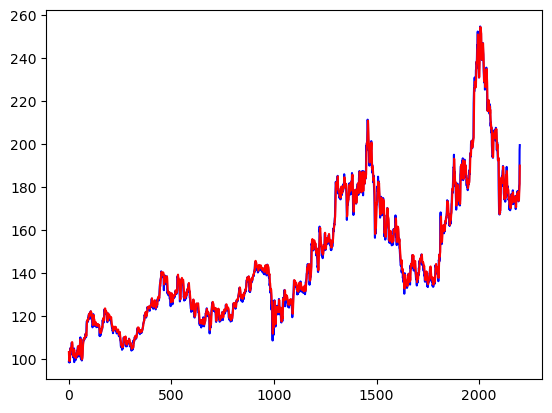

In [55]:
import matplotlib.pyplot as plt
plt.plot(actual_values,color='blue',label='Actual Stock Prices')
plt.plot(predictions,color='red',label='Predicted Stock Prices')
plt.show()

In [56]:
from sklearn.metrics import r2_score,mean_squared_error
accuracy=r2_score(predictions,actual_values)
mse=mean_squared_error(predictions,actual_values)
rmse=np.sqrt(mean_squared_error(predictions,actual_values))
print('Accuracy : ',accuracy)
print('Mean Squared Error : ',mse)
print('Root Mean Squared Error : ',rmse)

Accuracy :  0.9938774524232271
Mean Squared Error :  5.886038973001355
Root Mean Squared Error :  2.4261160262859143
